#Predicting Loan Repayment Behavior Using LendingClub Data

#### Data Pre-Processing & Preliminary Examination:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
#load dataset
loan_data = '/content/drive/MyDrive/DataBootcamp/loan_data.csv'
df = pd.read_csv(loan_data)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


###Step 4: Modeling and Interpretations


In [ ]:
#define feature set & target variable
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target variable

#split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(7662, 15)

In [ ]:
X_test.shape

(1916, 15)

In [ ]:
y_test.shape

(1916,)

In [ ]:
y_train.shape

(7662,)

In [ ]:
print(y_train.value_counts())

not.fully.paid
False    6434
True     1228
Name: count, dtype: int64


####Logistic Regression Model

In [ ]:
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)
predict_y_lr = lr_model.predict(X_test)

#assess model
print("Acc on training data: {:,.3f}".format(lr_model.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr_model.score(X_test, y_test)))

Acc on training data: 0.840
Acc on test data: 0.841


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(accuracy_score(y_test, predict_y_lr))

0.8413361169102297


In [ ]:
print(confusion_matrix(y_test, predict_y_lr))

[[1611    0]
 [ 304    1]]


In [ ]:
print(classification_report(y_test, predict_y_lr))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1611
        True       1.00      0.00      0.01       305

    accuracy                           0.84      1916
   macro avg       0.92      0.50      0.46      1916
weighted avg       0.87      0.84      0.77      1916



####Random Forest Model

In [ ]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
predict_y_rf = rf_model.predict(X_test)

#assess model
print("Acc on training data: {:,.3f}".format(rf_model.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rf_model.score(X_test, y_test)))

Acc on training data: 1.000
Acc on test data: 0.839


In [ ]:
print(accuracy_score(y_test, predict_y_rf))

0.8392484342379958


In [ ]:
print(confusion_matrix(y_test, predict_y_rf))

[[1601   10]
 [ 298    7]]


In [ ]:
print(classification_report(y_test, predict_y_rf))

              precision    recall  f1-score   support

       False       0.84      0.99      0.91      1611
        True       0.41      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.63      0.51      0.48      1916
weighted avg       0.77      0.84      0.77      1916



####KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
predict_y_knn = knn_model.predict(X_test)
#assess model
print("Acc on training data: {:,.3f}".format(knn_model.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(knn_model.score(X_test, y_test)))

Acc on training data: 0.847
Acc on test data: 0.822


In [ ]:
print(accuracy_score(y_test, predict_y_knn))

0.8215031315240083


In [ ]:
print(confusion_matrix(y_test, predict_y_knn))

[[1559   52]
 [ 290   15]]


In [ ]:
print(classification_report(y_test, predict_y_knn))

              precision    recall  f1-score   support

       False       0.84      0.97      0.90      1611
        True       0.22      0.05      0.08       305

    accuracy                           0.82      1916
   macro avg       0.53      0.51      0.49      1916
weighted avg       0.74      0.82      0.77      1916



####XGBoost Classifier

In [ ]:
pip install xgboost

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
predict_y_xgb = xgb_model.predict(X_test)

#assess model
print("Acc on training data: {:,.3f}".format(xgb_model.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(xgb_model.score(X_test, y_test)))

Acc on training data: 0.960
Acc on test data: 0.822


In [ ]:
print(accuracy_score(y_test, predict_y_xgb))

0.8215031315240083


In [ ]:
print(confusion_matrix(y_test, predict_y_xgb))

[[1551   60]
 [ 282   23]]


In [ ]:
print(classification_report(y_test, predict_y_xgb))

              precision    recall  f1-score   support

       False       0.85      0.96      0.90      1611
        True       0.28      0.08      0.12       305

    accuracy                           0.82      1916
   macro avg       0.56      0.52      0.51      1916
weighted avg       0.76      0.82      0.78      1916



####LightGBM Classifier

In [ ]:
pip install lightgbm

In [ ]:
lgb = lgb.LGBMClassifier()
lgb_model = lgb.fit(X_train, y_train)
predict_y_lgb = lgb_model.predict(X_test)

#assess model
print("Acc on training data: {:,.3f}".format(lgb_model.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lgb_model.score(X_test, y_test)))

[LightGBM] [Info] Number of positive: 1228, number of negative: 6434
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1813
[LightGBM] [Info] Number of data points in the train set: 7662, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160271 -> initscore=-1.656210
[LightGBM] [Info] Start training from score -1.656210
Acc on training data: 0.886
Acc on test data: 0.832


In [ ]:
print(accuracy_score(y_test, predict_y_lgb))

0.8319415448851775


In [ ]:
print(confusion_matrix(y_test, predict_y_lgb))

[[1590   21]
 [ 301    4]]


In [ ]:
print(classification_report(y_test, predict_y_lgb))

              precision    recall  f1-score   support

       False       0.84      0.99      0.91      1611
        True       0.16      0.01      0.02       305

    accuracy                           0.83      1916
   macro avg       0.50      0.50      0.47      1916
weighted avg       0.73      0.83      0.77      1916



###Step 5: Confusion Matrix and End Result

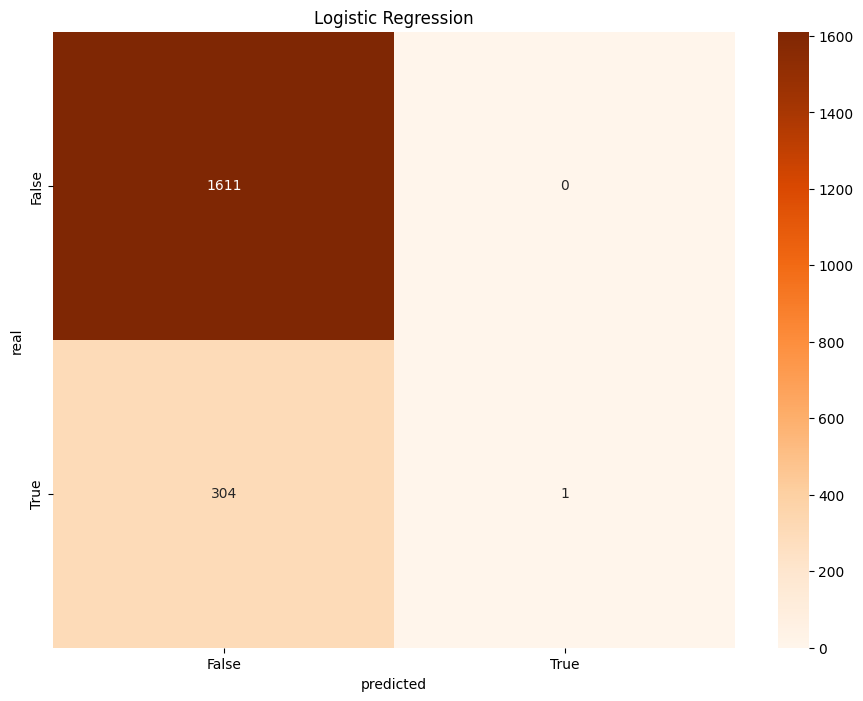

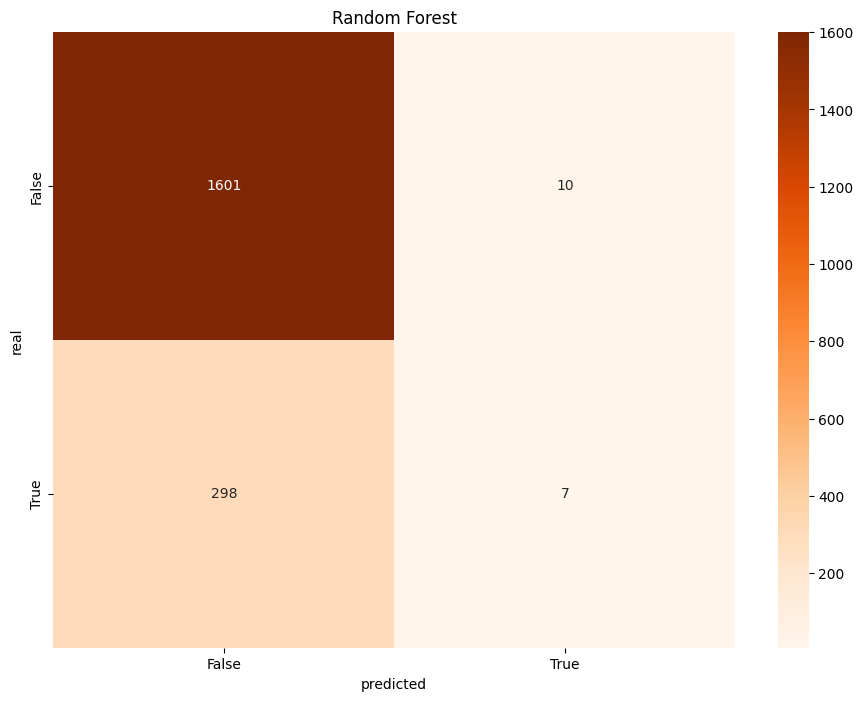

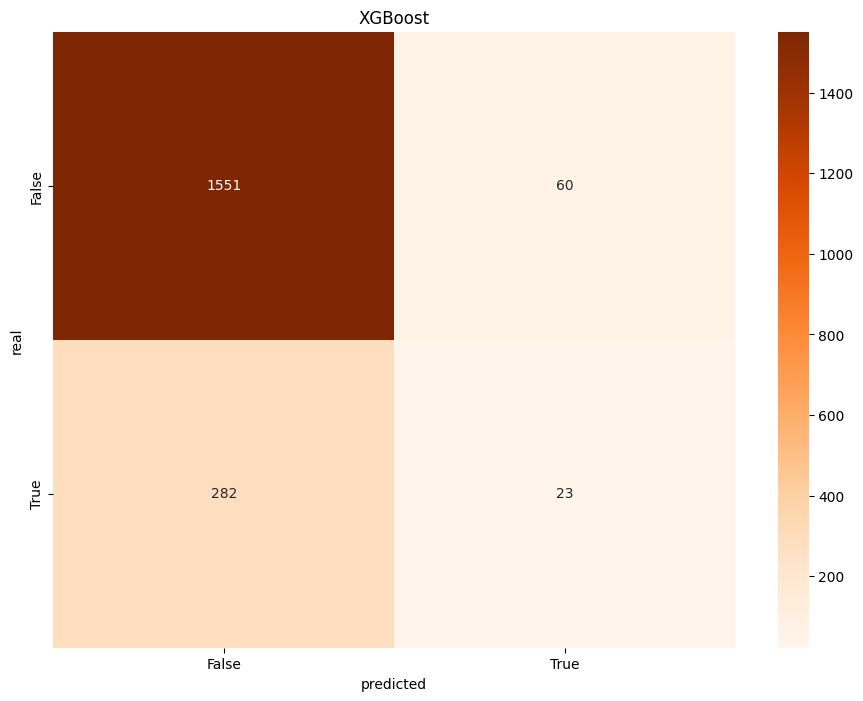

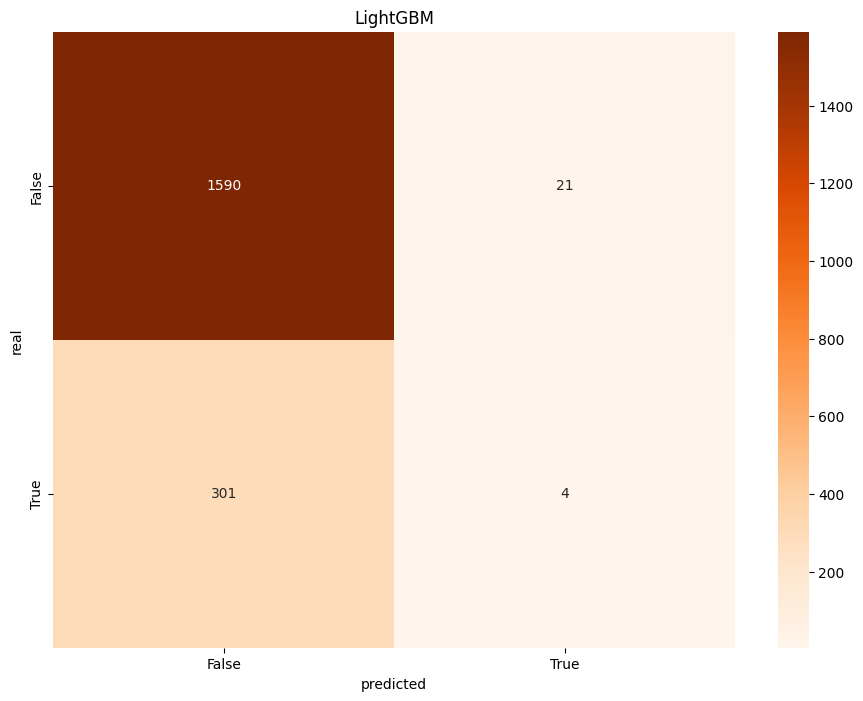

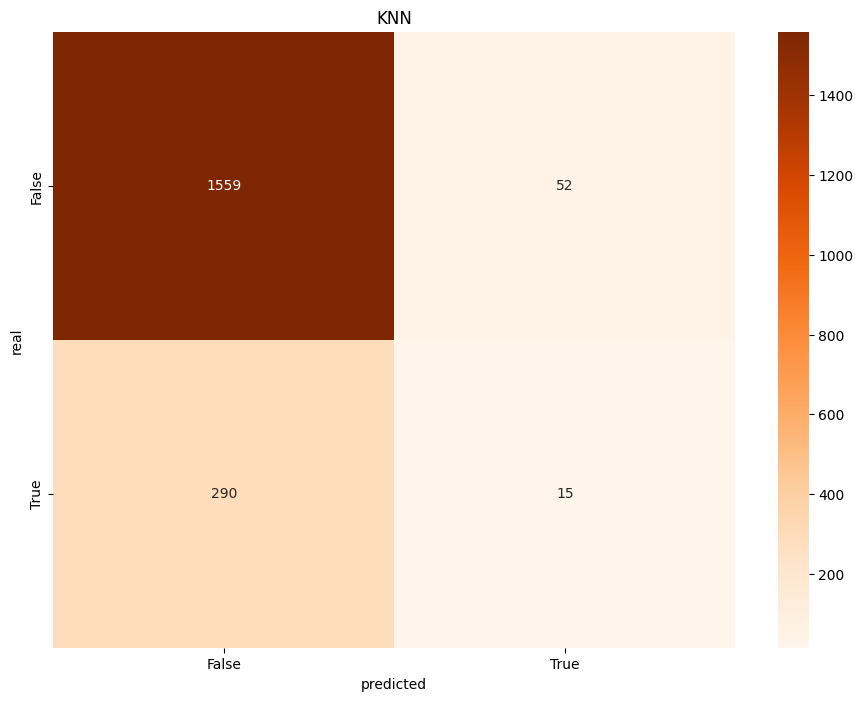

In [ ]:
#create function to plot confusion matrix
def plot_cm(true_y, predict_y, model_title):
    cm = confusion_matrix(true_y, predict_y)
    plt.figure(figsize=(11, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    plt.xlabel('predicted')
    plt.ylabel('real')
    plt.title(model_title)
    plt.show()

#plot confusion matrices for each model
plot_cm(y_test, predict_y_lr, "Logistic Regression")
plot_cm(y_test, predict_y_rf, "Random Forest")
plot_cm(y_test, predict_y_xgb, "XGBoost")
plot_cm(y_test, predict_y_lgb, "LightGBM")
plot_cm(y_test, predict_y_knn, "KNN")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

       False       0.86      0.53      0.66      1611
        True       0.18      0.55      0.27       305

    accuracy                           0.53      1916
   macro avg       0.52      0.54      0.47      1916
weighted avg       0.75      0.53      0.60      1916

Accuracy: 0.5339248434237995
Random Forest:
              precision    recall  f1-score   support

       False       0.85      0.88      0.86      1611
        True       0.23      0.20      0.21       305

    accuracy                           0.77      1916
   macro avg       0.54      0.54      0.54      1916
weighted avg       0.75      0.77      0.76      1916

Accuracy: 0.7677453027139874
XGBoost:
              precision    recall  f1-score   support

       False       0.85      0.92      0.88      1611
        True       0.28      0.16      0.21       305

    accuracy                           0.80      1916
   macro avg       0.56  

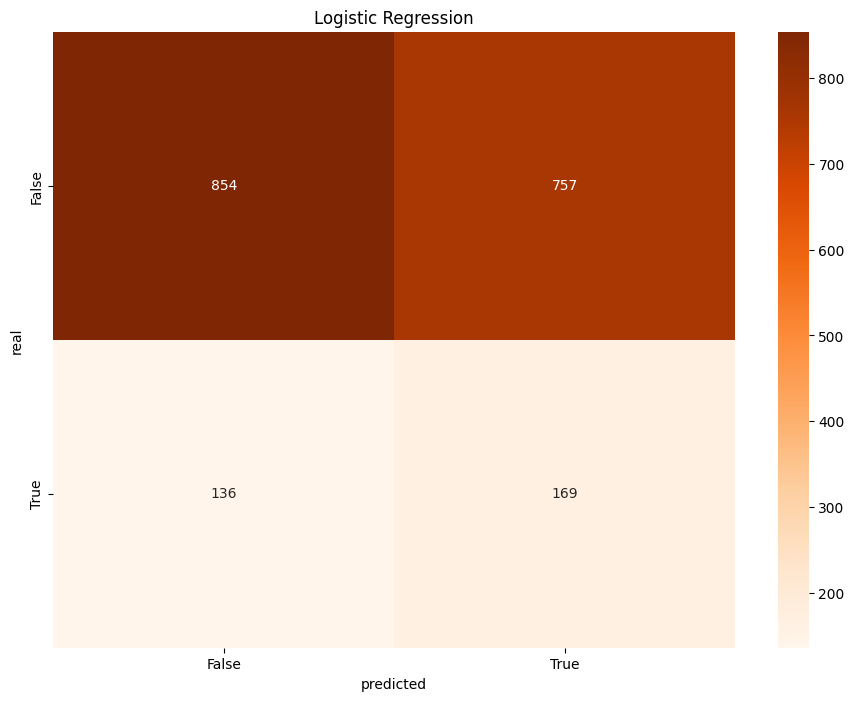

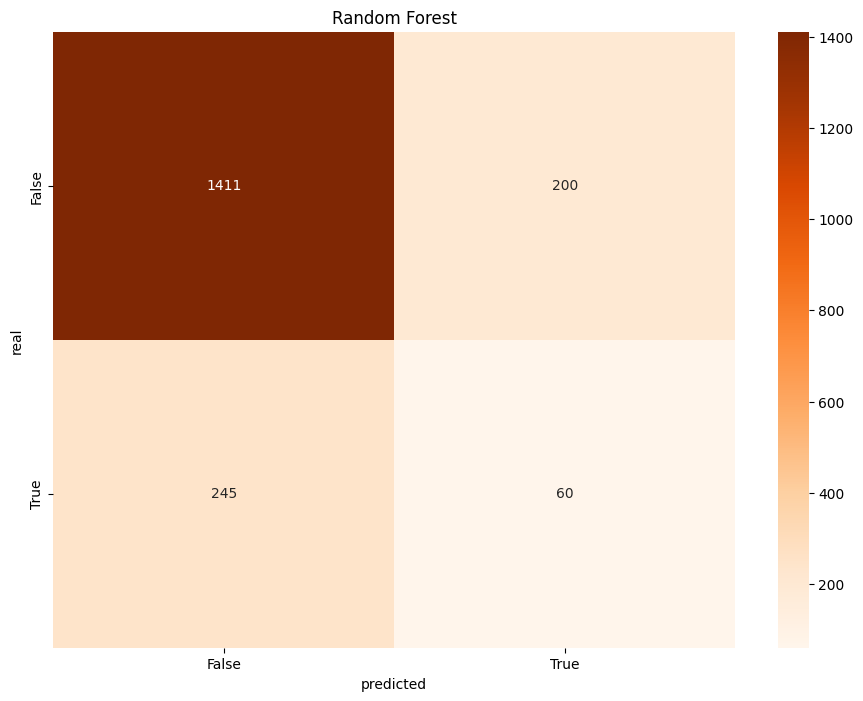

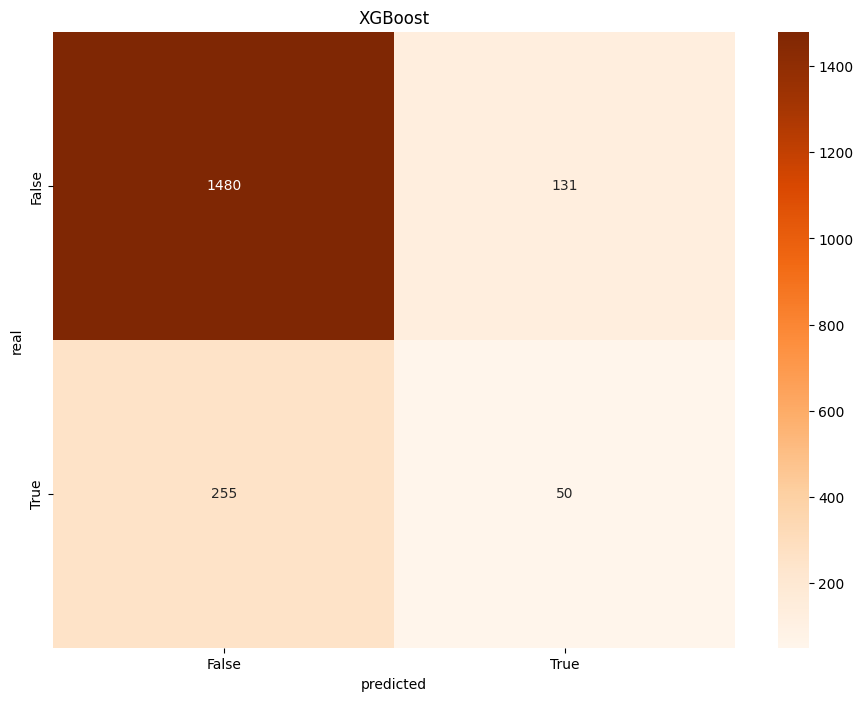

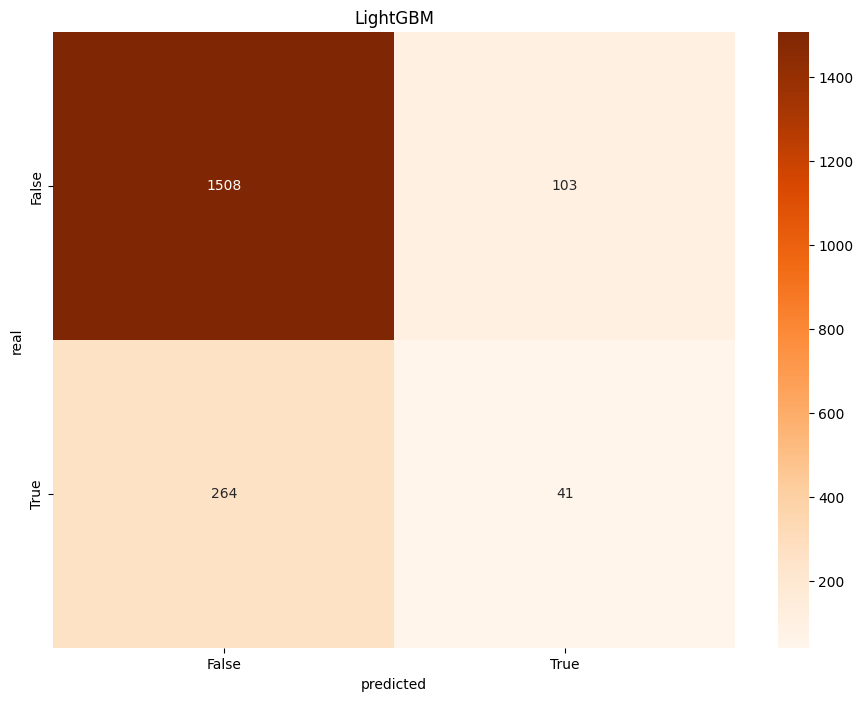

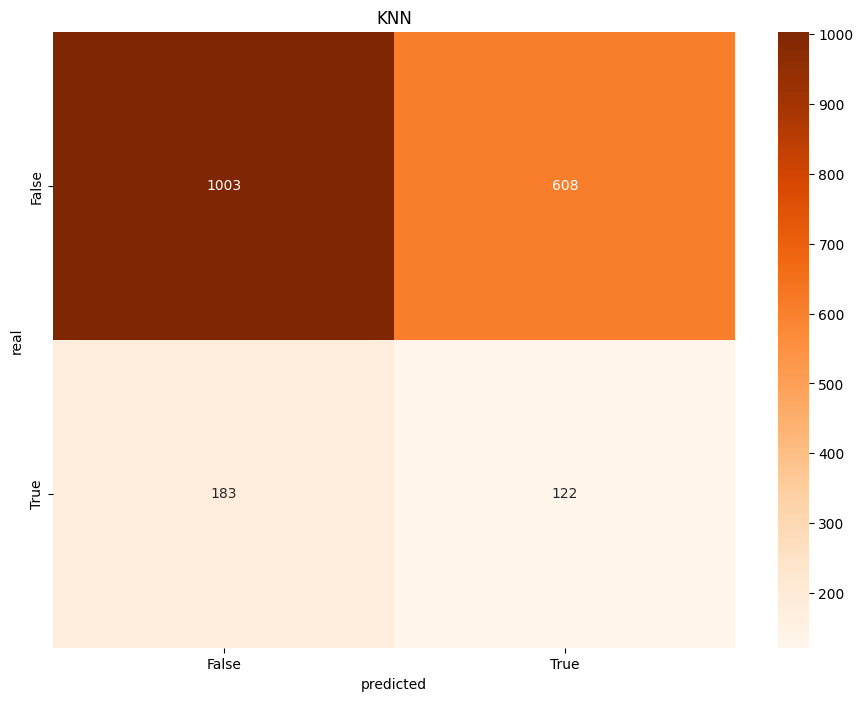

In [ ]:
#perform SMOTE on training set
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#create function to train & assess models
def train_evaluate(model, model_title):
    model.fit(X_train_res, y_train_res)
    predict_y = model.predict(X_test)
    accuracy = accuracy_score(y_test, predict_y)
    print(f"{model_title}:")
    print(classification_report(y_test, predict_y))
    print(f"Accuracy: {accuracy}")
    return predict_y

predict_y_lr = train_evaluate(lr_model, "Logistic Regression")
predict_y_rf = train_evaluate(rf_model, "Random Forest")
predict_y_xgb = train_evaluate(xgb_model, "XGBoost")
predict_y_lgb = train_evaluate(lgb_model, "LightGBM")
predict_y_knn = train_evaluate(knn_model, "KNN")

#plot confusion matrices for each model
plot_cm(y_test, predict_y_lr, "Logistic Regression")
plot_cm(y_test, predict_y_rf, "Random Forest")
plot_cm(y_test, predict_y_xgb, "XGBoost")
plot_cm(y_test, predict_y_lgb, "LightGBM")
plot_cm(y_test, predict_y_knn, "KNN")

In [ ]:
#train and evaluate models
def train_evaluate(model, model_title, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predict_y = model.predict(X_test)
    accuracy = accuracy_score(y_test, predict_y)
    precision = precision_score(y_test, predict_y, pos_label=1)
    recall = recall_score(y_test, predict_y, pos_label=1)
    f1 = f1_score(y_test, predict_y, pos_label=1)

    #classification report
    print(f"\n{model_title}:")
    print(classification_report(y_test, predict_y))
    print(f"Accuracy: {accuracy:.3f}")
    return accuracy, precision, recall, f1

#define models
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'KNN': knn_model
}

#create dataframe to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

#loop through models, evaluate each, store results
for model_name, model in models.items():
    accuracy, precision, recall, f1 = train_evaluate(model, model_name, X_train_res, y_train_res, X_test, y_test)
    results_df = pd.concat([results_df, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }])], ignore_index=True)

print("\nSummary of Model Performance:")
print(results_df)

best_model = results_df.loc[results_df['F1-Score'].idxmax()]
print("\nBest Model Based on F1-Score:")
print(best_model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-178-4b9c40cfda60>:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{



Logistic Regression:
              precision    recall  f1-score   support

       False       0.86      0.55      0.67      1611
        True       0.18      0.52      0.26       305

    accuracy                           0.54      1916
   macro avg       0.52      0.53      0.47      1916
weighted avg       0.75      0.54      0.60      1916

Accuracy: 0.541

Random Forest:
              precision    recall  f1-score   support

       False       0.86      0.88      0.87      1611
        True       0.26      0.23      0.25       305

    accuracy                           0.77      1916
   macro avg       0.56      0.55      0.56      1916
weighted avg       0.76      0.77      0.77      1916

Accuracy: 0.773

XGBoost:
              precision    recall  f1-score   support

       False       0.86      0.91      0.88      1611
        True       0.29      0.20      0.23       305

    accuracy                           0.79      1916
   macro avg       0.57      0.55      0.56     